**🔍 STEP 1: Loading the Dataset 📂**

In [1]:
import pandas as pd

data=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**🧼 STEP 2: Data Cleaning ✨🧹**

In [2]:
#handling missing values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# As the data shows missing values in Age, Cabin, and Embarked. We will:

# Fill missing 'Age' with mean values
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Fill missing 'Embarked' with mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop 'Cabin' due to excessive missing values
data.drop(columns='Cabin', inplace=True)

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [4]:
# Removing duplicates

data.drop_duplicates(inplace=True)

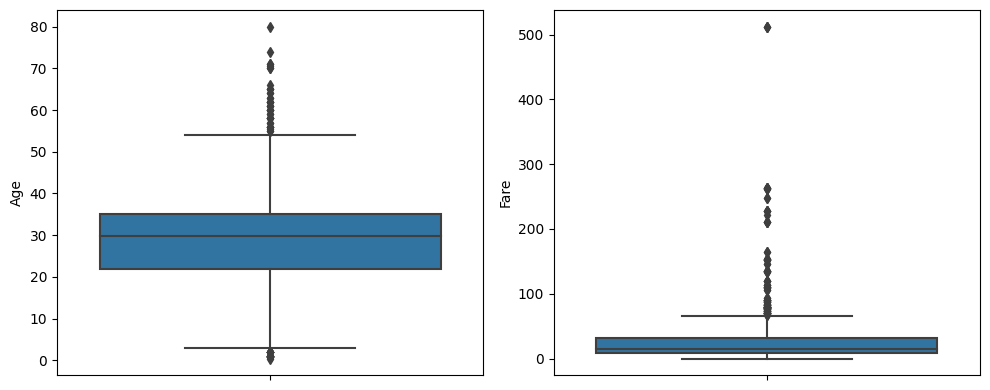

In [5]:
# To identify outliers, we will use Box Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=data)
plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=data)
plt.tight_layout()
plt.show()

In [6]:
#As the data shows outliers, we will manage them using Inter Quartile Range

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply to 'Age' and 'Fare'
data = remove_outliers_iqr(data, 'Age')
data = remove_outliers_iqr(data, 'Fare')



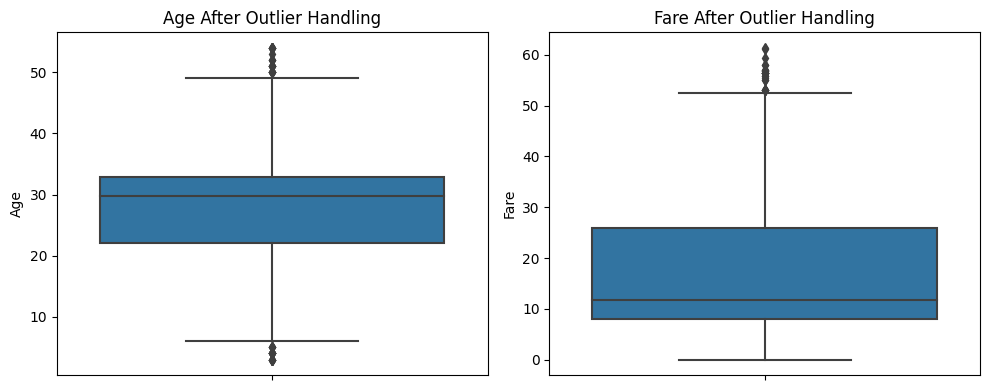

In [7]:
# Checking Box Plot again to see managed outliers


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=data)
plt.title('Age After Outlier Handling')

plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=data)
plt.title('Fare After Outlier Handling')

plt.tight_layout()
plt.show()

**📊 STEP 3: Visualization 🎨👁️‍🗨️**

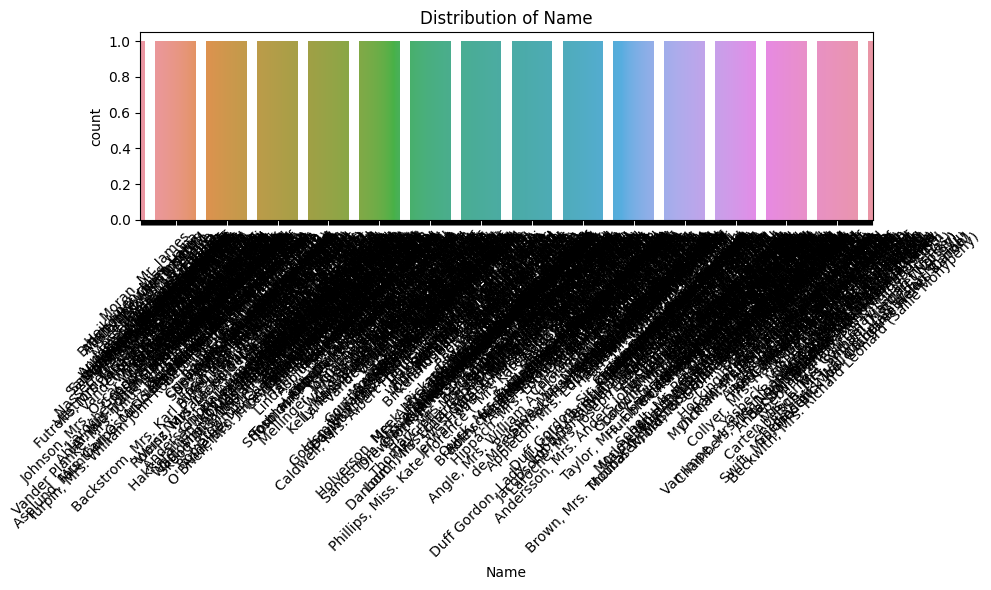

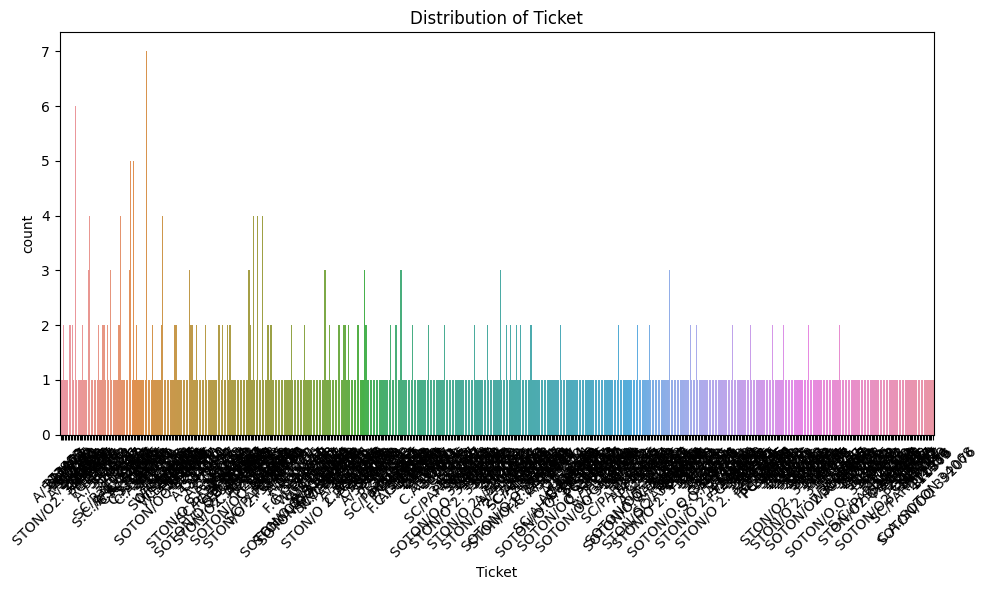

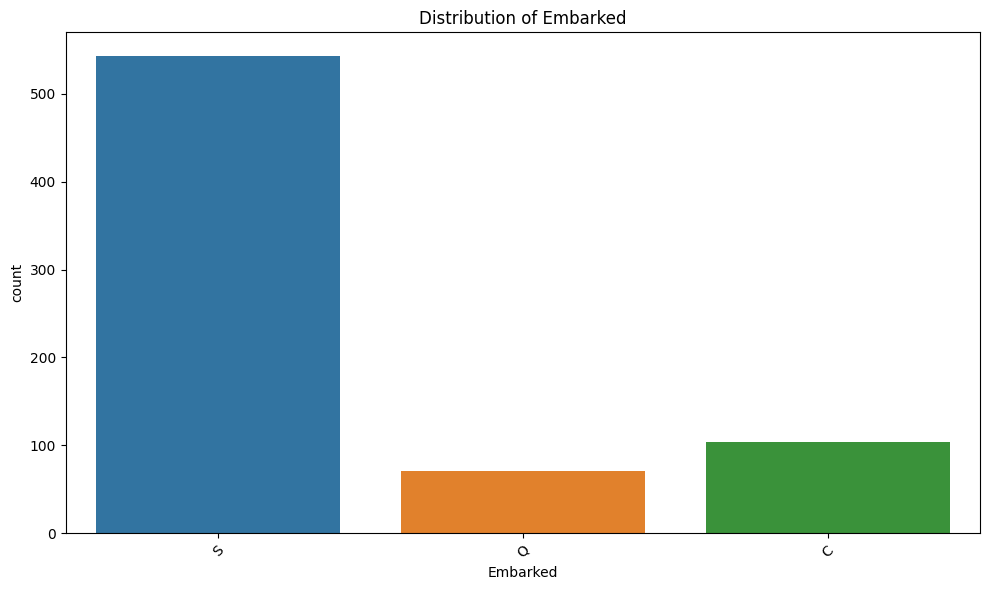

In [8]:
# We will make bar charts for categorical variables


categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

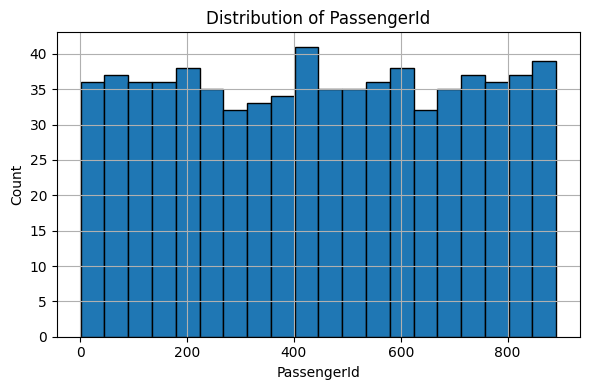

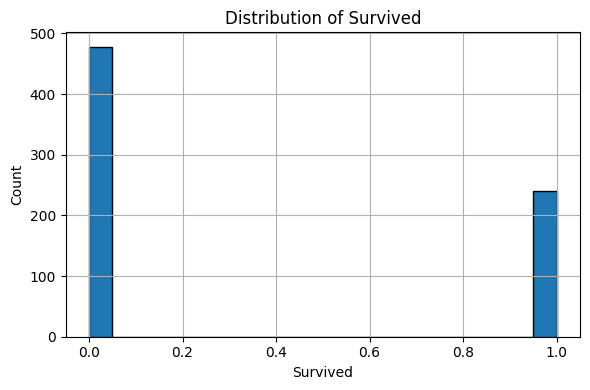

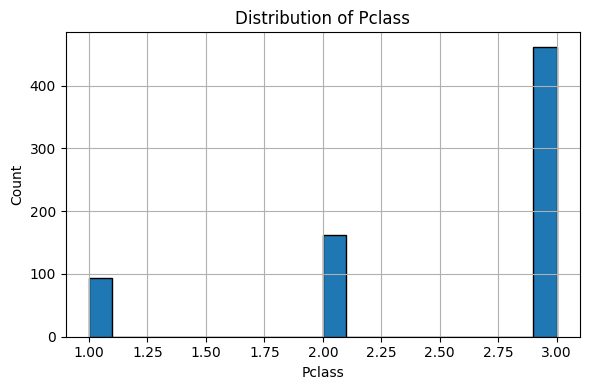

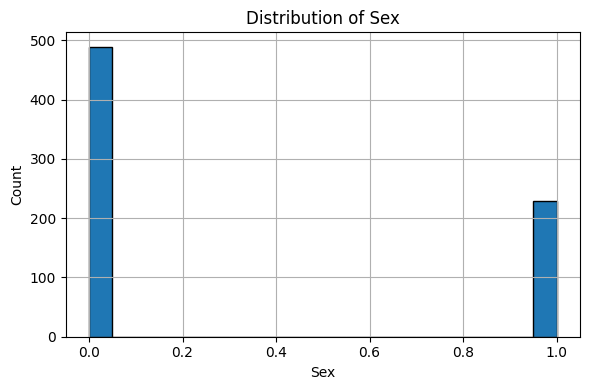

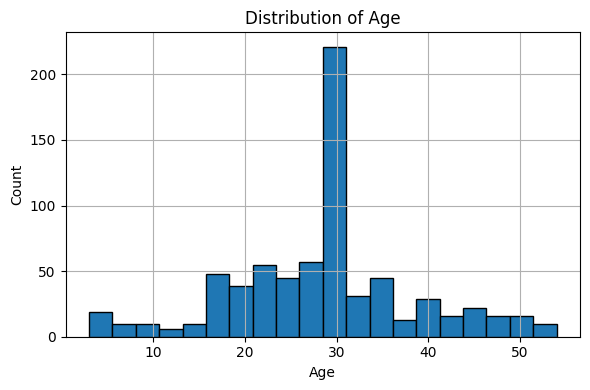

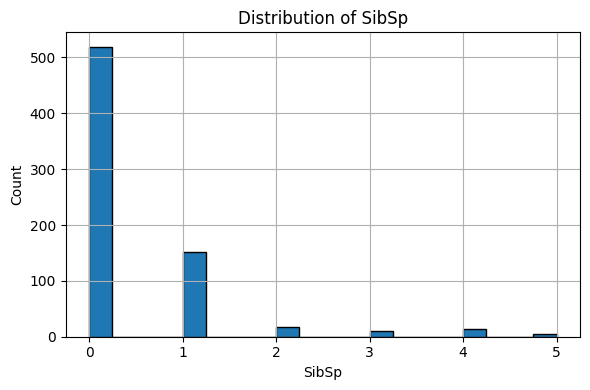

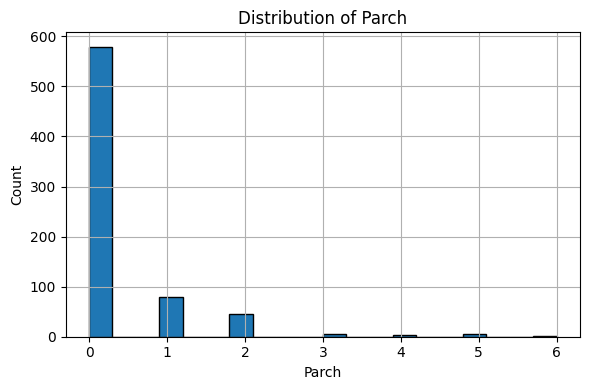

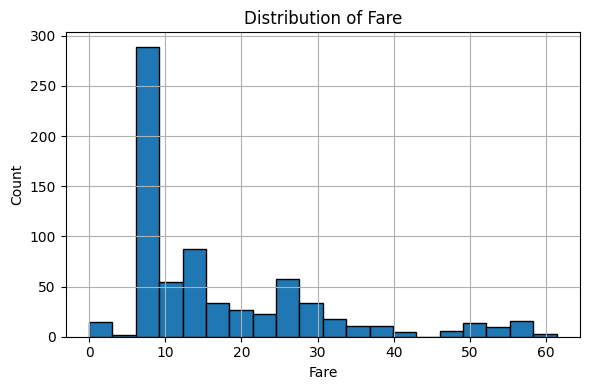

In [9]:
# We will make histogram for few numeric distributions


numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    data[col].hist(bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


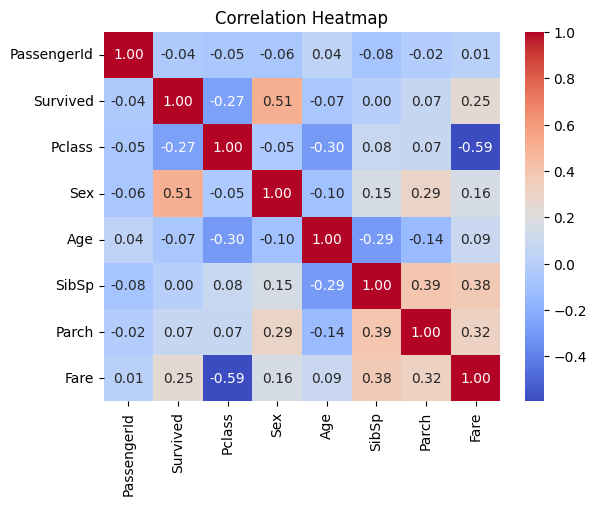

In [10]:
# correlation heatmap for numeric feature

import numpy as np


numeric_df = data.select_dtypes(include=[np.number])

corr = numeric_df.corr()


sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**🤖 STEP 4: Model Training 🧠⚙️ (for survival prediction)**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score



In [12]:
#SELECTING TARGET FEATURE

X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Q


In [13]:
# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
# 6. Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred = model.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.7272727272727272


In [16]:
# Save the full model
import joblib
joblib.dump(model,'Titanic.pkl')

['Titanic.pkl']

In [17]:

#PREDICTING HERE WITH SAMPLE DATASET VALUES

# Load the saved model
model = joblib.load('Titanic.pkl')

# --- Sample Prediction ---
sample = pd.DataFrame({
    'Pclass': [3],
    'Sex': [0],
    'Age': [22],
    'Fare': [7.25]
})

# Predict survival
predicted_survival = model.predict(sample)[0]


# Display results
print(f"Predicted Survival: {predicted_survival}")

Predicted Survival: 0


**📋 For Summary 📝🔍**

Sex
0    0.169734
1    0.685590
Name: Survived, dtype: float64

Pclass
1    0.563830
2    0.469136
3    0.240260
Name: Survived, dtype: float64

Axes(0.125,0.11;0.775x0.77)


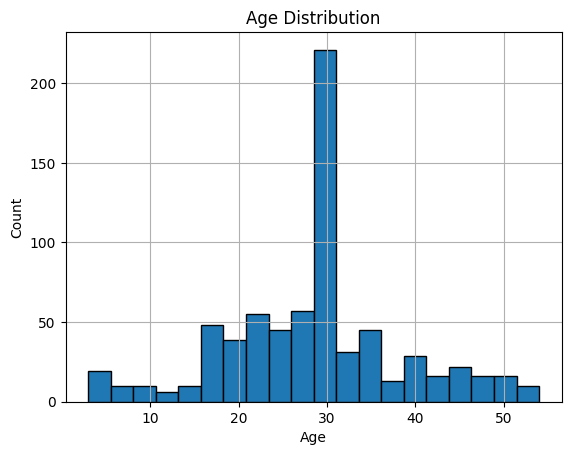


Axes(0.125,0.11;0.775x0.77)


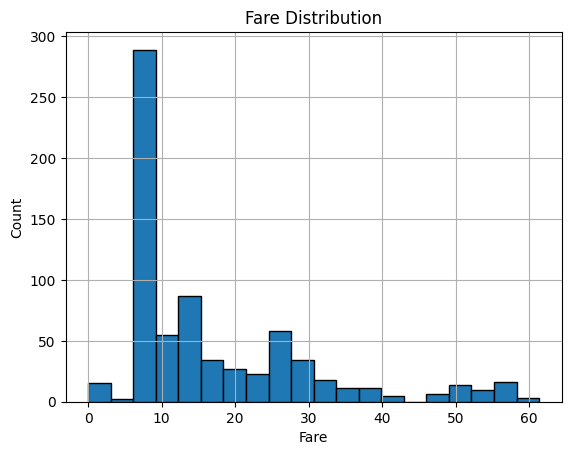

In [18]:
print(data.groupby('Sex')['Survived'].mean())
print()
print(data.groupby('Pclass')['Survived'].mean())
print()
print(data['Age'].hist(bins=20, edgecolor='black'))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print()
print(data['Fare'].hist(bins=20, edgecolor='black'))
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

**📌 Last Step: Summary 📊**

Gender and Survival: Females had a higher survival rate than males. 🚺 vs 🚹

Passenger Class Impact: First-class passengers were more likely to survive than those in third class. 🎩🛳️

Age Distribution: Most passengers were between 20-40 years old. 👶👵

Fare Outliers: Some passengers paid significantly more; log-transforming Fare might help with modeling. 💰🔍

Correlation Insight: Fare and Pclass show a moderate inverse correlation. 💸🔗